In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [2]:
df = pd.read_csv('states_all.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


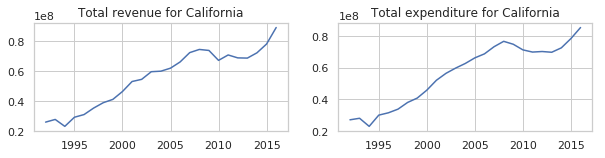

In [11]:
plt.figure(figsize=(10,2))
df_california = df[df['STATE']=='CALIFORNIA']
plt.subplot(1,2,1)
plt.plot(df_arizona['YEAR'], df_arizona['TOTAL_REVENUE'])
plt.title('Total revenue for California')

plt.subplot(1,2,2)
plt.plot(df_arizona['YEAR'], df_arizona['TOTAL_EXPENDITURE'])
plt.title('Total expenditure for California')
plt.show()

In [12]:
#Eksik değerleri enterpolasyon ile dolduruyoruz

df_california['TOTAL_REVENUE'].interpolate()
df_california['TOTAL_EXPENDITURE'].interpolate()
df_california[['TOTAL_REVENUE','TOTAL_EXPENDITURE']].tail()

,TOTAL_REVENUE,TOTAL_EXPENDITURE
1080,68868516.0,69727119.0
1131,72389126.0,72506810.0
1182,78248042.0,78365958.0
1233,89217262.0,85320133.0
1445,NaN,NaN


In [13]:
df_arizona.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,26.000000,2.400000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.400000e+01,...,24.000000,24.000000,24.000000,2.400000e+01,2.400000e+01,2.300000e+01,11.000000,11.000000,11.000000,10.000000
mean,2004.500000,5.945343e+06,5.579920e+07,5.788586e+06,3.096928e+07,1.904133e+07,5.624785e+07,2.788298e+07,1.623720e+07,2.907487e+06,...,464589.041667,451162.208333,399758.291667,3.702493e+06,1.784926e+06,5.562741e+06,225.659625,269.355244,207.911547,261.902652
std,7.648529,5.161468e+05,1.906039e+07,2.644842e+06,1.021866e+07,6.622908e+06,1.933199e+07,8.760682e+06,5.657804e+06,7.678186e+05,...,23269.805665,40487.316246,83004.284819,1.855079e+05,2.233884e+05,4.080587e+05,10.063398,5.638743,5.363399,4.861743
min,1992.000000,4.120498e+06,2.344084e+07,2.072470e+06,1.317555e+07,7.641041e+06,2.301269e+07,1.244386e+07,6.754346e+06,1.608514e+06,...,418418.000000,363296.000000,270675.000000,3.286034e+06,1.372011e+06,4.717112e+06,208.398961,260.892247,196.764414,254.895247
25%,1998.250000,5.811211e+06,3.918302e+07,3.149260e+06,2.284050e+07,1.319326e+07,3.808767e+07,2.008391e+07,1.093906e+07,2.247466e+06,...,459328.750000,421727.000000,330537.750000,3.647462e+06,1.615195e+06,5.311014e+06,220.510053,264.910990,205.774512,259.188273
50%,2004.500000,6.205884e+06,6.016233e+07,6.634068e+06,3.361777e+07,2.040243e+07,6.264795e+07,2.962497e+07,1.733888e+07,3.090236e+06,...,467656.000000,466502.500000,402385.000000,3.756885e+06,1.884940e+06,5.793407e+06,230.366957,270.381784,208.522186,261.902941
75%,2010.750000,6.228453e+06,7.095333e+07,7.556365e+06,3.775271e+07,2.380979e+07,7.122711e+07,3.465728e+07,2.065519e+07,3.505297e+06,...,485447.000000,479076.750000,482013.500000,3.811218e+06,1.968143e+06,5.843905e+06,231.968934,274.047188,211.952302,264.416677
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.060362e+07,8.532013e+07,4.258727e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,234.164993,276.638200,215.421814,269.197451


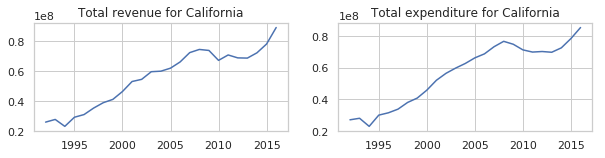

In [14]:
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
plt.plot(df_arizona['YEAR'], df_arizona['TOTAL_REVENUE'])
plt.title('Total revenue for California')

plt.subplot(1,2,2)
plt.plot(df_arizona['YEAR'], df_arizona['TOTAL_EXPENDITURE'])
plt.title('Total expenditure for California')
plt.show()

In [17]:
df_california[['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE']].mean().head()

AVG_MATH_4_SCORE       223.265888
AVG_MATH_8_SCORE       268.087255
AVG_READING_4_SCORE    206.932370
AVG_READING_8_SCORE    262.075874
dtype: float64

Matematik dersi okuma dersinden daha başarılıdır.

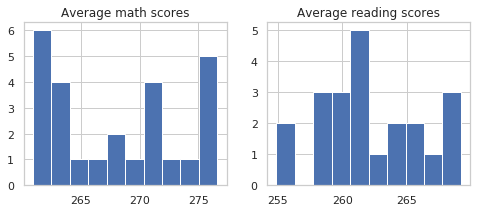

In [18]:
#Not dağılımları
plt.figure(figsize = (8,3))
plt.subplot(1,2,1)
plt.hist(df_california['AVG_MATH_8_SCORE'])
plt.title('Average math scores')

plt.subplot(1,2,2)
plt.hist(df_california['AVG_READING_8_SCORE'])
plt.title('Average reading scores')
plt.show()

In [26]:
#Eksik değerleri tamamlayalım.

df2 = df.copy()
liste = ['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for sutun in liste:
    df2.loc[:, sutun].fillna(df2.loc[:,sutun].mean(), inplace=True)

In [27]:
df3 = df.copy()
liste = ['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

for sutun in liste:
    df3.loc[:, sutun].fillna(df3.loc[:,sutun].median(), inplace=True)

In [28]:
df4 = df.copy()

for sutun in liste:
    df4.loc[:, sutun].interpolate(inplace=True)

In [30]:
for sutun in liste:
    display('{} istatistiği:'.format(sutun))
    display(pd.concat([df[sutun], df2[sutun], df3[sutun], df4[sutun]], axis=1).describe())
    

'AVG_MATH_4_SCORE istatistiği:'

,AVG_MATH_4_SCORE,AVG_MATH_4_SCORE,AVG_MATH_4_SCORE,AVG_MATH_4_SCORE
count,536.000000,1492.000000,1492.000000,1492.000000
mean,234.768293,234.768293,236.351113,231.831206
std,10.221511,6.122843,6.236570,9.888230
min,187.134670,187.134670,187.134670,187.134670
25%,229.694352,234.768293,237.238552,223.340211
50%,237.238552,234.768293,237.238552,233.721360
75%,241.995486,234.768293,237.238552,239.951138
max,253.420961,253.420961,253.420961,253.420961


'AVG_MATH_8_SCORE istatistiği:'

,AVG_MATH_8_SCORE,AVG_MATH_8_SCORE,AVG_MATH_8_SCORE,AVG_MATH_8_SCORE
count,532.000000,1492.000000,1492.000000,1492.000000
mean,278.414711,278.414711,279.832894,274.751965
std,10.159722,6.063038,6.154327,8.676490
min,232.831510,232.831510,232.831510,232.831510
25%,272.761598,278.414711,280.618803,268.959808
50%,280.618803,278.414711,280.618803,274.343601
75%,285.347428,278.414711,280.618803,281.420997
max,300.568235,300.568235,300.568235,300.568235


'AVG_READING_4_SCORE istatistiği:'

,AVG_READING_4_SCORE,AVG_READING_4_SCORE,AVG_READING_4_SCORE,AVG_READING_4_SCORE
count,533.000000,1492.000000,1492.000000,1492.000000
mean,218.866154,218.866154,219.862357,218.278270
std,7.769616,4.641053,4.700141,6.095477
min,178.557612,178.557612,178.557612,178.557612
25%,214.663401,218.866154,220.416034,214.568273
50%,220.416034,218.866154,220.416034,218.954112
75%,223.999337,218.866154,220.416034,222.376359
max,236.773867,236.773867,236.773867,236.773867


'AVG_READING_8_SCORE istatistiği:'

,AVG_READING_8_SCORE,AVG_READING_8_SCORE,AVG_READING_8_SCORE,AVG_READING_8_SCORE
count,498.000000,1492.000000,1492.000000,1491.000000
mean,263.661132,263.661132,264.560382,262.125714
std,6.803725,3.928132,3.979401,5.310612
min,236.379102,236.379102,236.379102,236.379102
25%,259.533171,263.661132,265.010912,258.619193
50%,265.010912,263.661132,265.010912,261.079602
75%,268.190121,263.661132,265.010912,266.227052
max,280.499130,280.499130,280.499130,280.499130
